<a href="https://colab.research.google.com/github/radicaleid/photo_processing_sisi/blob/main/photo_processing_sisi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 输入下列选项; 2. Run all cells (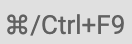)

In [50]:
#@title
import matplotlib.pyplot as plt
import numpy as np

from skimage import io
from skimage.util import img_as_ubyte
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.color import rgb2gray

def getEntropy(file="https://www.pngarts.com/files/3/Fox-PNG-Photo.png",size=10,cmap='rainbow'):
    image=io.imread(file)
    image=rgb2gray(img_as_ubyte(image/np.max(image)))
    photo_size=(12,9)
    fig0, ax0 = plt.subplots(ncols=1, figsize=photo_size
                                   #,sharex=True, sharey=True
                                   )
    print('高: {} 像素， 宽： {} 像素'.format(image.shape[0],image.shape[1]))
    img0 = ax0.imshow(image, cmap=plt.cm.gray)
    ax0.set_title("Image")
    ax0.axis("off")
    fig0.colorbar(img0, ax=ax0)
    plt.show()

    fig1, ax1 = plt.subplots(ncols=1, figsize=photo_size
                                   #,sharex=True, sharey=True
                                   )
    img_entropy=entropy(image, disk(size))
    img_entropy=img_entropy/np.max(img_entropy)
    img1 = ax1.imshow(img_entropy, cmap=cmap)
    ax1.set_title("Entropy")
    ax1.axis("off")
    fig1.colorbar(img1, ax=ax1)
    plt.show()

    fig2, ax2 = plt.subplots(ncols=1, figsize=photo_size
                                   #,sharex=True, sharey=True
                                   )
    img2 = ax2.imshow((image+img_entropy)/2., cmap=cmap)
    ax2.set_title("Overlay")
    ax2.axis("off")
    fig2.colorbar(img2, ax=ax2)

    #fig2.tight_layout()

    plt.show()

In [51]:
#@title 图片地址或链接
file="https://www.pngarts.com/files/3/Fox-PNG-Photo.png" #@param {type:"string"}

In [52]:
#@title 区域范围（像素）
size=10 #@param {type:"integer"}

In [53]:
#@title color map name (rainbow, coolwarm, 更多https://matplotlib.org/stable/tutorials/colors/colormaps.html)
cmap="rainbow" #@param {type:"string"}

高: 1024 像素， 宽： 773 像素


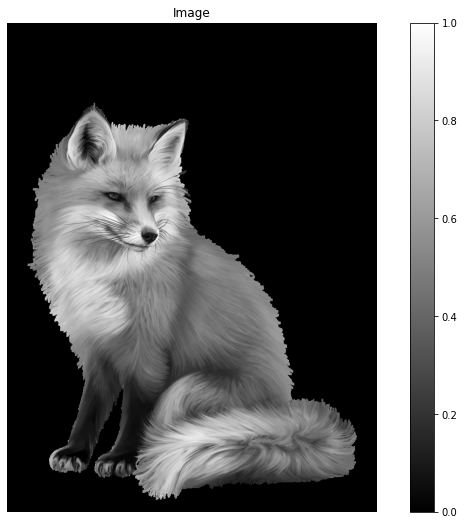

/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


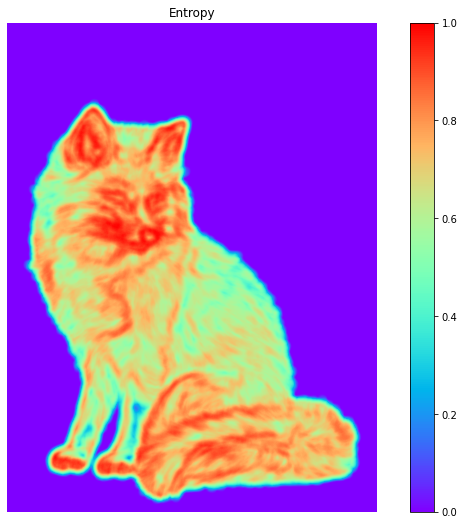

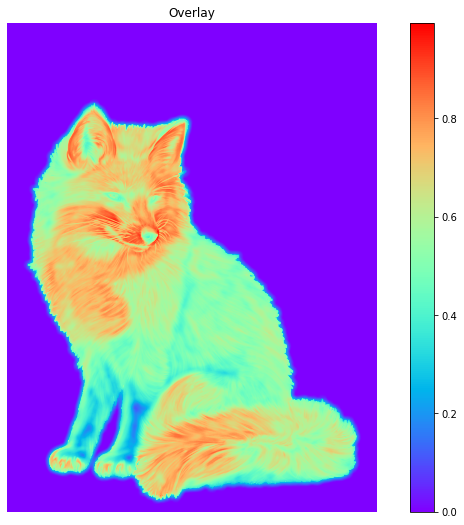

In [54]:
#@title 
getEntropy(file=file,size=size,cmap=cmap)
